In [45]:
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
# import nomkl

In [2]:
current_dir = os.getcwd()

# Original Dataset 
filename = 'df_processed.csv'
filepath = os.path.normpath(os.path.join(current_dir, '../data/processed/', filename))


chunk_size = 10000
chunks = []

for chunk in pd.read_csv(filepath, chunksize=chunk_size):
    chunk.drop_duplicates(inplace=True)
    chunk.dropna(inplace=True)
    chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)

In [3]:
df_users = pd.read_csv(os.path.normpath(os.path.join(current_dir, '../data/features/', 'users_behaviur.csv')))
df_words = pd.read_csv(os.path.normpath(os.path.join(current_dir, '../data/features/', 'word_complexity_features.csv')), sep='\t')

In [4]:
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,history_seen,history_correct,session_seen,session_correct,h_recall,lang_combination
0,1.000000,1362082032,444407,u:dDwF,es,en,73eecb492ca758ddab5371cf7b5cca32,3,3,1,1,1.000000,en-es
1,1.000000,1362082044,5963,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,8,6,6,6,0.750000,en-de
2,0.750000,1362082044,5963,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,6,5,4,3,0.833333,en-de
3,0.888889,1362082044,5963,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,6,5,9,8,0.833333,en-de
4,0.800000,1362082044,5963,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,8,6,5,4,0.750000,en-de


In [5]:
df_1 = df.merge(df_words, on = 'lexeme_id', how='inner')

In [6]:
df_1

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,history_seen,history_correct,session_seen,...,gender,def,tense,POS,person,number,word,word_len,tags_list,SUBTLEX
0,1.000000,1362082032,444407,u:dDwF,es,en,73eecb492ca758ddab5371cf7b5cca32,3,3,1,...,NaN,NaN,NaN,pr,NaN,NaN,bajo,4,['pr'],111241.0
1,1.000000,1362082044,5963,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,8,6,6,...,NaN,NaN,pri,vblex,p3,sg,lernt,5,"['vblex', 'pri', 'p3', 'sg']",3391.0
2,0.750000,1362082044,5963,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,6,5,4,...,f,def,NaN,det,NaN,sg,die,3,"['det', 'def', 'f', 'sg']",2484854.0
3,0.888889,1362082044,5963,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,6,5,9,...,m,NaN,NaN,n,NaN,sg,mann,4,"['n', 'm', 'sg']",222707.0
4,0.800000,1362082044,5963,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,8,6,5,...,f,NaN,NaN,n,NaN,sg,frau,4,"['n', 'f', 'sg']",143725.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12509996,0.800000,1363104897,368,u:i5D8,en,it,d5efc552aaea3109eb5388aa1ec8673d,6,4,5,...,NaN,def,NaN,det,NaN,sp,the,3,"['det', 'def', 'sp']",22761659.0
12509997,0.800000,1363104897,368,u:i5D8,en,it,a826c47947d68549fa81e19cafa57ba0,4,4,5,...,NaN,NaN,pres,vblex,NaN,NaN,eat,3,"['vblex', 'pres']",197654.0
12509998,1.000000,1363104897,368,u:i5D8,en,it,5e29d77697d23070a1fb92eb6c90e9b6,4,4,4,...,NaN,NaN,NaN,n,NaN,sg,bread,5,"['n', 'sg']",24828.0
12509999,0.600000,1363104897,368,u:i5D8,en,it,cdfecc9247566d40bb964a218c54c783,3,2,5,...,NaN,NaN,pres,vblex,NaN,NaN,drink,5,"['vblex', 'pres']",182580.0


In [7]:
df_2 = df_1.merge(df_users, on = ['user_id', 'lang_combination'], how='inner')

In [8]:
df_2

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,history_seen,history_correct,session_seen,...,person,number,word,word_len,tags_list,SUBTLEX,avg_user_p_recall,avg_delta,std_delta,avg_h_recall
0,1.000000,1362082032,444407,u:dDwF,es,en,73eecb492ca758ddab5371cf7b5cca32,3,3,1,...,NaN,NaN,bajo,4,['pr'],111241.0,0.885194,2.475405e+06,2.879771e+06,0.954897
1,1.000000,1362082044,5963,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,8,6,6,...,p3,sg,lernt,5,"['vblex', 'pri', 'p3', 'sg']",3391.0,0.614120,3.104417e+03,2.977079e+03,0.890225
2,0.750000,1362082044,5963,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,6,5,4,...,NaN,sg,die,3,"['det', 'def', 'f', 'sg']",2484854.0,0.614120,3.104417e+03,2.977079e+03,0.890225
3,0.888889,1362082044,5963,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,6,5,9,...,NaN,sg,mann,4,"['n', 'm', 'sg']",222707.0,0.614120,3.104417e+03,2.977079e+03,0.890225
4,0.800000,1362082044,5963,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,8,6,5,...,NaN,sg,frau,4,"['n', 'f', 'sg']",143725.0,0.614120,3.104417e+03,2.977079e+03,0.890225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12509996,0.800000,1363104897,368,u:i5D8,en,it,d5efc552aaea3109eb5388aa1ec8673d,6,4,5,...,NaN,sp,the,3,"['det', 'def', 'sp']",22761659.0,0.948715,5.391088e+04,6.550006e+04,0.892502
12509997,0.800000,1363104897,368,u:i5D8,en,it,a826c47947d68549fa81e19cafa57ba0,4,4,5,...,NaN,NaN,eat,3,"['vblex', 'pres']",197654.0,0.948715,5.391088e+04,6.550006e+04,0.892502
12509998,1.000000,1363104897,368,u:i5D8,en,it,5e29d77697d23070a1fb92eb6c90e9b6,4,4,4,...,NaN,sg,bread,5,"['n', 'sg']",24828.0,0.948715,5.391088e+04,6.550006e+04,0.892502
12509999,0.600000,1363104897,368,u:i5D8,en,it,cdfecc9247566d40bb964a218c54c783,3,2,5,...,NaN,NaN,drink,5,"['vblex', 'pres']",182580.0,0.948715,5.391088e+04,6.550006e+04,0.892502


In [9]:
df_2.columns

Index(['p_recall', 'timestamp', 'delta', 'user_id', 'learning_language',
       'ui_language', 'lexeme_id', 'history_seen', 'history_correct',
       'session_seen', 'session_correct', 'h_recall', 'lang_combination',
       'gender', 'def', 'tense', 'POS', 'person', 'number', 'word', 'word_len',
       'tags_list', 'SUBTLEX', 'avg_user_p_recall', 'avg_delta', 'std_delta',
       'avg_h_recall'],
      dtype='object')

In [10]:
### PREPARE DATA FOR ML 
dff = df_2.drop(columns=['timestamp', 'lexeme_id', 'word', 'user_id'])

In [11]:
dff.columns

Index(['p_recall', 'delta', 'learning_language', 'ui_language', 'history_seen',
       'history_correct', 'session_seen', 'session_correct', 'h_recall',
       'lang_combination', 'gender', 'def', 'tense', 'POS', 'person', 'number',
       'word_len', 'tags_list', 'SUBTLEX', 'avg_user_p_recall', 'avg_delta',
       'std_delta', 'avg_h_recall'],
      dtype='object')

In [12]:
categorical_cols = dff.select_dtypes(include=['object']).columns.tolist()

In [13]:
# Two approaches to handle tags 
# 1) Store tags as list, but delete rows where there are less than x occurences 
dff_1 = dff.copy()
tag_counts = dff_1['tags_list'].value_counts()
rare_threshold = 1000
dff_1['tags_list'] = dff_1['tags_list'].apply(lambda x: x if tag_counts[x] > rare_threshold else 'rare')

dff_1.drop(columns=['POS', 'person', 'number', 'gender', 'tense', 'def'], inplace=True)

In [14]:
# 2) Store each tag as column, replace NaN values with a placeholder for categorical columns
dff_2 = dff.copy()
dff_2[categorical_cols] = dff_2[categorical_cols].fillna('missing')
dff_2.drop(columns=['tags_list'], inplace=True)

In [15]:
# dff['gender'].value_counts(normalize=True)
# dff['tense'].value_counts(normalize=True)
# dff['person'].value_counts(normalize=True)
# dff['POS'].value_counts(normalize=True)
# dff['number'].value_counts(normalize=True)

In [16]:
dff_1

,p_recall,delta,learning_language,ui_language,history_seen,history_correct,session_seen,session_correct,h_recall,lang_combination,word_len,tags_list,SUBTLEX,avg_user_p_recall,avg_delta,std_delta,avg_h_recall
0,1.000000,444407,es,en,3,3,1,1,1.000000,en-es,4,['pr'],111241.0,0.885194,2.475405e+06,2.879771e+06,0.954897
1,1.000000,5963,de,en,8,6,6,6,0.750000,en-de,5,"['vblex', 'pri', 'p3', 'sg']",3391.0,0.614120,3.104417e+03,2.977079e+03,0.890225
2,0.750000,5963,de,en,6,5,4,3,0.833333,en-de,3,"['det', 'def', 'f', 'sg']",2484854.0,0.614120,3.104417e+03,2.977079e+03,0.890225
3,0.888889,5963,de,en,6,5,9,8,0.833333,en-de,4,"['n', 'm', 'sg']",222707.0,0.614120,3.104417e+03,2.977079e+03,0.890225
4,0.800000,5963,de,en,8,6,5,4,0.750000,en-de,4,"['n', 'f', 'sg']",143725.0,0.614120,3.104417e+03,2.977079e+03,0.890225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12509996,0.800000,368,en,it,6,4,5,4,0.666667,it-en,3,"['det', 'def', 'sp']",22761659.0,0.948715,5.391088e+04,6.550006e+04,0.892502
12509997,0.800000,368,en,it,4,4,5,4,1.000000,it-en,3,"['vblex', 'pres']",197654.0,0.948715,5.391088e+04,6.550006e+04,0.892502
12509998,1.000000,368,en,it,4,4,4,4,1.000000,it-en,5,"['n', 'sg']",24828.0,0.948715,5.391088e+04,6.550006e+04,0.892502
12509999,0.600000,368,en,it,3,2,5,3,0.666667,it-en,5,"['vblex', 'pres']",182580.0,0.948715,5.391088e+04,6.550006e+04,0.892502


In [17]:
# One-hot encode categorical variables
categorical_cols = dff_1.select_dtypes(include=['object']).columns.tolist()
ohe = OneHotEncoder(sparse_output=False)
ohe_data = ohe.fit_transform(dff_1[categorical_cols])

In [19]:
ohe_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(categorical_cols))
df_encoded = pd.concat([dff_1.select_dtypes(exclude='O'), ohe_df], axis=1)
df_encoded.dropna(inplace=True)

In [21]:
X = df_encoded.drop(columns='p_recall')
y = df_encoded['p_recall']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=42)

In [22]:
# Scaling the data
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Correlation between variables
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')  
# plt.show()

In [24]:
# Linear regression 
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [28]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('R2:', r2_score(y_test, predictions)*100)

MAE: 0.08283839511385616
R2: 75.08412762305295


/var/folders/_b/l_819g5924d_y00npn9gt60h0000gn/T/ipykernel_17221/4120333611.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


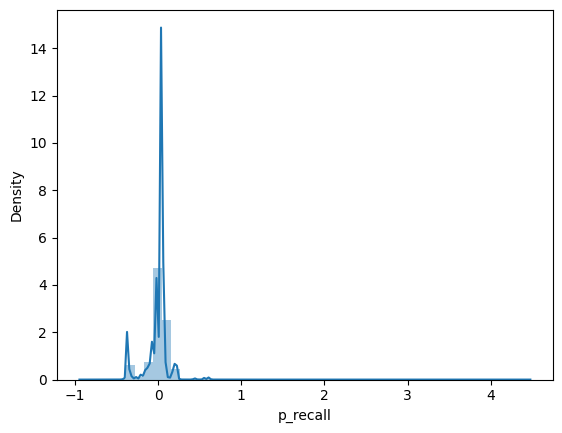

In [31]:
# Check if residuals are normally distributed 
sns.distplot((y_test-predictions),bins=50);

In [37]:
# Logistic Regression 
# Train 
y_train_binary = (y_train > 0.5).astype(int) 
model1 = LogisticRegression(penalty=None, max_iter=1000, random_state = 42)
model1.fit(X_train, y_train_binary)

# Test
predictions1 = model1.predict_proba(X_test)[:,1]

NameError: name 'roc_auc_score' is not defined

In [49]:
y_test_binary = (y_test > 0.5).astype(int) 
auc1 = roc_auc_score(y_test_binary, predictions1)
# mse = mean_squared_error(y_test_binary, predictions1)
r2 = r2_score(y_test_binary, predictions1)
print(
    f"AUC for logistic regression with no regularization: {auc1:.3f}")
# print('MSE', mse)
print('R2', r2)

AUC for logistic regression with no regularization: 1.000
R2 0.999999999999822


In [38]:
predictions1

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       1.00000000e+00, 1.00000000e+00, 1.65384762e-38])

In [ ]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))